### 1. Les arbres de décision

#### 1.1 Tout savoir sur les arbres de décision

- C'est un outil permettant de prendre une décision en fonction d'une série des questions, le choix de chaque question dépendant des réponses précédentes.

- Les arbres de décision sont des algorithmes de ML qui permettent déffectuer automatiquement des tâches de classification et de régression.

- Algorithmes qui peuvent s'attaquer aux données complexes et qui peuvent résoudre des problèmes linéaires ou non linéaires

- Un arbre de décision c'est une suite de règle qui permet de résoudre un problème de classification ou de régréssion 

- Les arbres de décision sont souvent utilisés car ils sont ce qu'on appelle des white box c-à-d un algorithme qui est très interprètable autrement dire savoir comment sa décision a été prise.

- Un autre point fort des arbres de décision : c'est qu'ils nécessitent très peu de préparation des données avant d'entraîner un algorithme de ML d'arbre de décision :

     - Ne nécessite pas du tout de mise à l'échelle 

     - Ni de normalisation de données
     
**Vocabulaire**

- **Node**

Un arbre de décision dispose de différents types de nodes (noeuds)

- les nodes qui appliquent des règles de décision
- le root node qui est le premier node de l'arbre
- les leaf nodes, les décisions prises par l'arbre

- **Un node applique une règle à notre arbre, par exemple : "Est ce qu'il fait froid ?"**

- Ces nodes servent à mieux comprendre notre problème pour prendre la meilleure décision possible

- Le leaf node est le dernier node des arbres. En parcourant les différentes règles de notre arbre, nous finissons dans une de ces feuilles qui nous retournera la décision de l'arbre pour l'exemple en question.

- **Profondeur**

La profondeur d'un arbre correspond à sa chaîne de décision la plus longgue du root note jusqu'à la leaf node.

- Le root node est de profondeur 0 car à ce stade, il n'y apas encore des règles appliquées.

**Fonction coût**

Pour entraîner un arbre de décision, il va falloir déterminer une fonction de coût, c-à-d **le moyen de calculer l'erreur de prédiction**.

- Le travail de l'algorithme sera la minimisation de l'erreur de l'arbre calculé par la fonction choisie.

**Pour un arbre de régression, on utilisera comme fonction coût le MSE**

$$MSE_{\text{node}} = \frac{1}{\text{pop}_{node}} \sum_{i\in\text{node}} (\hat{y}^{(i)} - y^{(i)})^2$$

- Plus la prédiction sera éloignée de la valeur cible, plus l'erreur sera élevée.

- Cela forcera l'arbre à choisir des règles afin de créer des sous-populations avec des variables cibles homogène.


**Pour un arbre de classification, on utilisera comme fonction de coût l'indice  Gini : qui permet de calculer la pureté de nos nodes**

$$G_i = 1 - \sum_{k=1}^n p_{i,k}^2$$

- Pour calculer l'indice Gini pour un node, on prend la probabilité d'appartenance à chaque classe élevée au carrée et on va sommer, puis on fait 1 moins cette somme.

- **Le but des arbres de décision** est de créer  les classes les plus pur possible pour classifier au mieux et résoudre au mieux notre problème c-à-d des règles de décisions qui vont diminuer au mieux l'indice Gini le long de notre arbre.

- Cela forcera l'arbre à choisir des règles pour discrimer les données selon leur variable cible.

- Pour un node pur le Gini sera égale à 0 car on a 100% de chance que notre observation appartient à la bonne classe 

**Construire un arbre**

Le but sera de choisir chaque règle de l'arbre dans le but de minimiser le plus possible la fonction coût.

- L'algorithme va tout simplement essayer toutes les règles possibles en fonction de nos données et choisir celle qui minimise le plus la fonction coût.

**Les limites**

- Cet algorithme est simple mais gourmand en temps de calcul. 

- Il recherche avidement une répartition optimale au niveau supérieur, puis répète le processus à chaque niveau.

- Il ne vérifie pas si la règle condura ou non à une impureté aussi faible que possible plusieurs niveaux plus bas.

- Un algorithme gourmand produit souvent une solution raisonnablement bonne, mais il n'est pas garanti que ce soit la solution optimale.

- Les arbres de décisions créent des limites de décision orthogonales, ce qui les rend sensibles à la rotation des ensembles d'entraînement

- Les arbres de décision sont également instables car ils sont très sensibles à de petites variations des données d'entraînement.

**Implémentation en Python**

**Classification**

Jeu de données du titanic

**Les paramètres du modèle :** c'est tout ce qui permet de changer la manière dont le modèle va fonctionner 

- Pour avoir un modèle performant il faut régler ces paramètre pour avoir le meilleur modèle possible. 


In [125]:
# Import de packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
import os 

from IPython.display import Image

In [145]:
# Import des données
dataset = pd.read_csv("./datasets/titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [147]:
# Premier tri pour garder les caractéristiques qui nous intéressent
dataset.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [148]:
dataset.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [149]:
#Séparation en caractéristiques (features) et cible (target)
X = dataset.drop(['Survived'], axis = 1)
y = dataset["Survived"]

In [150]:
X.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [151]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Vérifie s'il y a des nan

In [152]:
X.isna().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

In [153]:
y.isna().sum()

0

Remplaçons les nan de la colonne age par la moyenne des ages.

In [154]:
X["Age"] = X["Age"].fillna(X["Age"].mean())

In [155]:
X.isna().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

Remplacer les valeurs catégorielles de la colonne "Age" par des valeurs numériques

In [156]:
X["Sex"] = X["Sex"].map({'male': 1, 'female':2})

In [157]:
X.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,2,38.0
2,3,2,26.0
3,1,2,35.0
4,3,1,35.0


#### Construire le Modèle d'arbre de décision

In [158]:
# Création de train et test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [159]:
# Modèle
modelTree = tree.DecisionTreeClassifier(random_state=0, 
                                        criterion='gini', 
                                        max_depth=6)

In [160]:
# Entraînement du modèle
modelTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [161]:
#Train test score
accuracyTreeTrain = modelTree.score(X_train, y_train)
accuracyTreeTest = modelTree.score(X_test, y_test)

print(f"Accuracy Abre Train : {accuracyTreeTrain :.5f}")
print(f"Accuracy Abre Test  : {accuracyTreeTest :.5f}")

Accuracy Abre Train : 0.83006
Accuracy Abre Test  : 0.79888


#### Pour comparer avec la régression logitique

In [162]:
modelLR = LogisticRegression(random_state=0, solver="newton-cg")
modelLR.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [163]:
#Train test score pour LP
acc_train_LR  = modelLR.score(X_train, y_train)
acc_test_LR  = modelLR.score(X_test, y_test)

print(f"Accuracy Abre Train (LR) : {acc_train_LR :.5f}")
print(f"Accuracy Abre Test  (LR) : {acc_test_LR :.5f}")

Accuracy Abre Train (LR) : 0.77949
Accuracy Abre Test  (LR) : 0.79330


#### On génère une image de notre arbre de décision

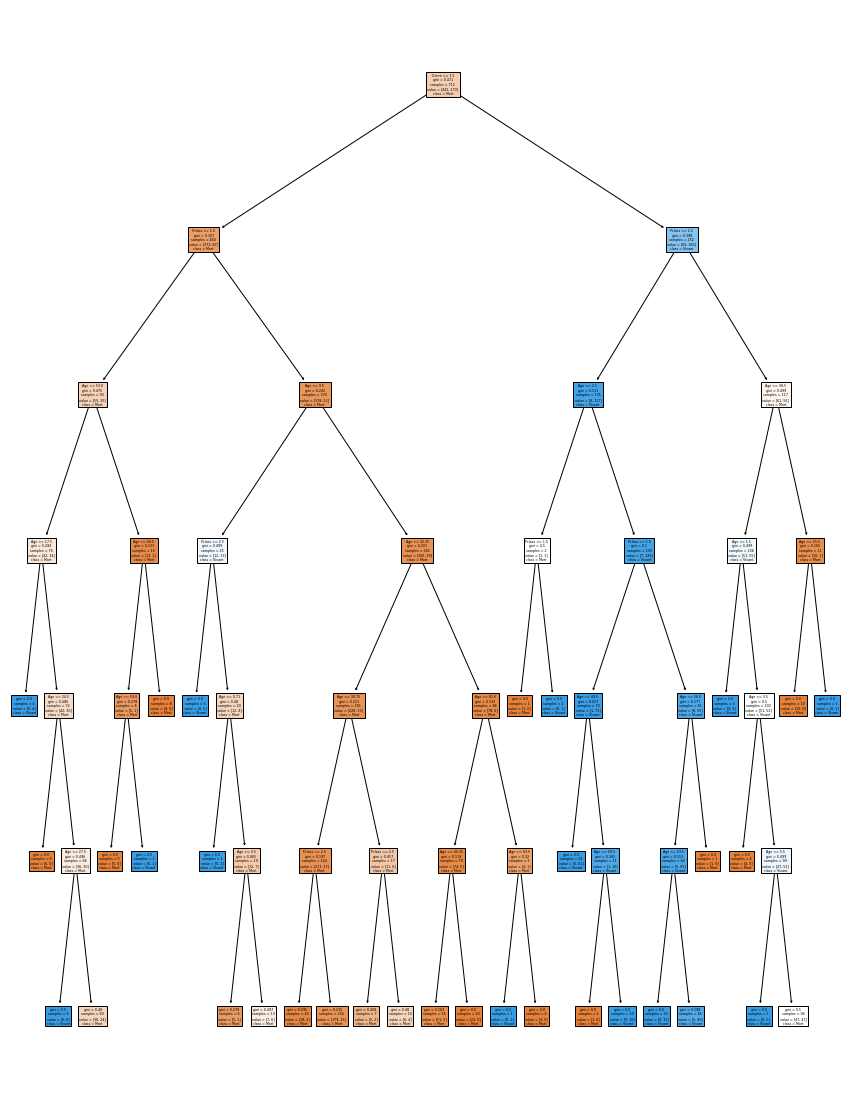

In [164]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,20))
plot_tree(modelTree, feature_names=["Pclass", "Genre", "Age"], class_names=["Mort", "Vivant"], filled=True)
plt.savefig("tree_titanic")
plt.show()

Nouvelle prédiction

In [165]:
X_pred = np.array([1, 1, 54]).reshape(1, -1)
modelTree.predict(X_pred)[0]

0

**Régression**

Le jeu de données publicitaire  


In [238]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LinearRegression

In [239]:
dataset = pd.read_csv("./datasets/Advertising.csv")

In [240]:
dataset.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [241]:
dataset.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [242]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [243]:
dataset.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [244]:
y = dataset["sales"]
X = dataset.drop(["sales"], axis = 1)

In [245]:
y.isna().sum()

0

In [246]:
X.isna().sum()

TV           0
radio        0
newspaper    0
dtype: int64

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Les critères valides sont :

- "mse" → équivalent à l’ancien "mse" (erreur quadratique moyenne)

- "friedman_mse" → variante adaptée aux boosting methods

- "absolute_error" → équivalent à la MAE

- "poisson" → pour des cibles de comptage positives

In [248]:
modelTreeR = tree.DecisionTreeRegressor(criterion="mse", max_depth=6, random_state=0)

In [249]:
modelTreeR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [250]:
acc_train = modelTreeR.score(X_train, y_train)
acc_test = modelTreeR.score(X_test, y_test)

print(f"Accuracy Abre Reg Train : {acc_train :.5f}")
print(f"Accuracy Abre Reg Test  : {acc_test :.5f}")

Accuracy Abre Reg Train : 0.99523
Accuracy Abre Reg Test  : 0.93247


Comparaison avec La régression linéaire

In [254]:
# Preprocessing #
# Initialisation
std = StandardScaler()

# Fit Transform
X_train_std = std.fit_transform(X_train)

# Transform
X_test_std = std.transform(X_test)

In [255]:
RegL = LinearRegression()

In [256]:
RegL.fit(X_train_std, y_train)

LinearRegression()

In [258]:
acc_trainRegL = RegL.score(X_train_std, y_train)
acc_testRegL = RegL.score(X_test_std, y_test)

print(f"Accuracy Abre Reg Train : {acc_trainRegL :.5f}")
print(f"Accuracy Abre Reg Test  : {acc_testRegL :.5f}")

Accuracy Abre Reg Train : 0.89779
Accuracy Abre Reg Test  : 0.85478


### 2. Ensemble Learning : Bagging, Boosting et Stacking

L'ensemble learning est une technique qui consiste à entraîner plus modèle de ML, pour ensuite considérer l'ensemble de prédiction.

Il existe 3 grandes méthodes qui sont : 

- Le Bagging

- Le Boosting

- Le stacking 

Les algorithmes qui reposent sur ces méthodes comme : **Random Forest** comptent parmi les plus performants dans le monde du ML

**Mise en situation**

- Considérons 3 modèles de ML et utilisons les pour effectuer 10 prédictions

- Supposons que nos modèles ont effectué chacun 70% de bonnes réponses

- Supposons aussi que nos modèles n'ont pas tous fait les mêmes erreurs au même endroit.

- Du coup si on venait à combiner les résultats de nos différents modèles pour ne garder à chaque fois la prédiction majoritaire, on pourrait obtenir plus de bonnes réponses (par exemple 90%)

Dans ce cas on constate que **lorsqu'on regroupe nos modèles tous ensembles, on obtient une meilleure performance que lorsqu'on utilise nos modèles chacun de leur côté.

- Ce résultat vient d'un phénomène appelé **The Wisdom of the crowd**

- On ppeut encore aller plus loin : en regroupant plusieurs modèles chacun ayant à peine 51% de performance et ensemble réussir à atteindre 99% de bonnes réponses. 

- Ceci est dû à **la loi des grands nombres** : plus vous avez de modèles avec chacune une performance juste au dessus de 50% plus la performance collective s'approche des 100%.

- Pour que cela fonctionne il faut 3 critère :
    - chaque modèle doit avoir une performance au dessus de 50%
    - Il faut un minimum de diversité (pour que les faiblesses des uns soient compensées par la force des autres)
    - il faut réunir plusieurs modèles respectants les deux premières conditions.
    
- Pour se faire on dispose de 3 méthodes : Bagging, Boosting, Stacking

**Bagging**
Créer deux entités d'un même modèle (par plusieurs arbre de décision), et d'entraîner chacune de ces entités sur une portion aléatoire de notre dataset.

- Pour ça, on utilise une technique d'échantillonnage appelé **Bootstrapping** qui consiste à replacer après chaque tirage au sort les données qui ont été selectionnées dans notre dataset.

- De cette manière, on obtient une foule de modèle diversifié, puisqu'ils n'ont pas tous été nourris avec les mêmes données mais qui partagent certaines connaissances en commun (très important pour obtenir des majorités en faveur des bonnes réponses)

- Une fois qu'on a cette foule on peut regrouper les résultats de chaque modèle pour faire notre prédiction finale 

- L'exemple d'algorithme le plus connu est celui de **RandomForest** (modèle dans lequel le modèle de base est l'arbre de décision).

Un autre façon d'obtenir des ensembles de modèle qui soit diversifié est d'utiliser une technique appelée : **Boosting**

**Boosting**

L'idée est d'entraîner l'un après l'autre plusieurs modèles relativement faible en demandant à chaque modèle d'essayer de corriger les erreurs effectuées par son prédécesseur.

- On obtient un ensemble de modèles parfaitement complémetaire dans lequele les faiblesses des uns sont compensées par les forces des autres

- Pour faire ça, il existe deux grands algorithmes :

    - **AdaBoost**
    - **Gradient Boosting**


Différence entre **Bagging** et **Boosting**

1. Dans le Bagging, on entraîne nos modèles en parallèle et dans le Boosting nos modèles sont entraînés en série.

2. Dans le Bagging nos modèles sont tous relativement fort et sont chacun en situation d'overfitting et le fait de rassembler leurs prédictions permet de **réduire la variance de la foule**. À l'inverse avec le Boosting, nos modèles sont tous relativement faibles  et chacun en situation d'underfitting, mais en les construisant les uns par dessus les autres, on est capable de **réduire le biais de la foule** 

Il existe un 3 technique d'ensemble très populaire le **stacking**. 

**Stacking**

L'idée est d'entraîner un modèle de ML par dessus les prédictions de notre foule de modèle.

- Au lieu de simplement rassembler les résultats de nos modèles pour retenir une prédiction majoritaire, on demande à un modèle d'apprendre à reconnaître qui à tort ou raison dans notre foule pour lui même prédire le résultat final.

Dans **Scikit-learn** on va retrouver tous ces algorithmes dans le module ensemble.

On a d'abord :

- **VotingClassifier() et VotingRegressor()** qui sont les implémentations les plus basiques qui peuvent d'une foule "wisdowm of the crowd". Avec ces deux classe on va entrer la liste de modèle qu'on veut entrer dans notre foule; les modèles vont être entraîner et les résultats regroupés pour retenir le résultat général, sous forme de vote

- On a aussi le estimateurs qui permettent de faire du **Bagging**

    - **BaggingClassifier() et BaggingRegressor(), estimateurs de bases pour faire du bagging
    
    - **RandomForest** qui est réellement la technique la plus populaire 
    - On a aussi **IsolationForrest** qui fait aussi appel à la technique de bootstrapping
    
- On a aussi les estimateurs de **Boosting**

    - **AdaBoostClassifier() et AdaBoostRegressor()**
    - **GrandientBoostingClassifier() et GradientBoostingClassifier()**
    
- On a aussi deux classes qui nous permettent de faire du stacking : 

    - **StackingClassifier() et StackingRegressor()**

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

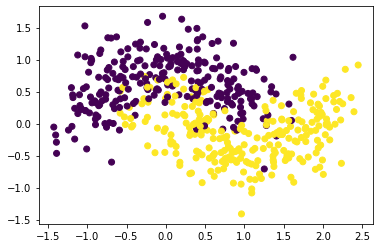

In [321]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=0)

## Voting classifier

In [323]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Pour le votting classifier
from sklearn.ensemble import VotingClassifier

Pour utiliser voting classifier il faut commencer par définir quels vont être les modèles qui vont les composés

In [324]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

D'abord la performance de chacun de ces modèles

In [325]:
for model in (model_1, model_2, model_3):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86


On utilise maintenant le voting classifier :

On a en entrée :

- Une liste de tuple ("nom", model)
- La technique de vote : On a deux techniques de vote:

    - Hard voting : vote sur les prédictions (prendre la prédiction majoritaire)
    - Soft voting : vote sur les probabilités (accumuler les probabilités de chaque classe)
    
- Le vote soft est un peu meilleur lorsque nos modèles sont bien calibrés
    
Dans le cas de **VotingRegressor()** la prédiction finale correspond à la moyenne.

In [326]:
model_4 = VotingClassifier([("SGD", model_1),
                            ("Tree", model_2),
          m                  ("KNN", model_3)],
                          voting = 'hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


Le voting classifier fonctionne ici mais ce n'est pas une technique d'ensemble éfficace car il très difficile avec cette de respecter le 3e critère de diversité. Ici nos modèles sont performants en terme de prédictions vont tous nous dire la même chose.

- **La meilleure façon de gagner de la diversité est grâce au Bagging et au Boosting**


## Bagging

- Pour le **BaggingClassifier** on renseigne en paramètre 
    - un estimateur de base avec lequel on désir travailler,  
    - le nombre d'estimateur qu'on souhaite avoir dans notre foule
    

- Pour le **RandomForestClassifier** on precise en paramètre le nombre d'estimateurs qu'on désire avoir

    - Il n'est pas utilise de préciser le base_estimator car par défaut le RandomForestClassifier utilise  l'estimateur d'arbre de decision

In [1]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [328]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8866666666666667

In [332]:
model = RandomForestClassifier(n_estimators=100, max_depth=7)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933333333333333

**En général un RandomForest va avoir de meilleure performace qu'un BaggingClassifier avec comme base_estimator un KNeighborClassifier mais il va falloir le régler

- On peut jouer ave l'argument **max_depth**

## Boosting

- Pour **AdaBoostClassifier** on renseigne comme paramètre le n_estimators 

- Pour **GrandientBoostingClassifier** on précise le n_estimators

In [336]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [340]:
model = AdaBoostClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

In [341]:
model = GradientBoostingClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933333333333333

On peut régler les hyperparamètres de notre modèle :

- choisir un autre estimateur de base (différent de decisision tree par défaut)
    
-  préciser un lr
    
- La même chose à faire si on souhaite avoir la meilleur configuration c'est de faire **GridSearchCV**

## Stacking

Le principe est d'entraîner un estimateur par dessus les prédictions de nos différents modèles.

- On va prende le VotingClassifier du début en le remplaçant par StackingClassifier 

- Au lieu d'avoir un voting on a un final_estimator à choisir

In [342]:
from sklearn.ensemble import StackingClassifier

In [343]:
model_4 = StackingClassifier([("SGD", model_1),
                            ("Tree", model_2),
                            ("KNN", model_3)],
                          final_estimator=KNeighborsClassifier())
model_4.fit(X_train, y_train)
model_4.score(X_test, y_test)

0.8666666666666667

Quel technique utiliser ?

- Le **Bagging** est souvent utilisé lorsque nos modèles singuliers ont tendances à faire de l'overfitting, le fait de créer plusieurs experts et de faire la moyenne ou le vote de leurs prédictions en faisant du bootstrapping va réduire cet overfitting

- Si on travail sur un problème dans lequel les modèles pris individuellement ont du mal à atteindre une bonne performance sur le trainset  on utilise du **Boosting**

- Quand au **Stacking** elle peut être une technique très forte si l'on a passé énormément de temps à entraîner chaque modèle individuellement.